## <font color="#5fbefe"> <u>Submitted by:</u> Rafael Ashurov 312054711, Corinne Golan 302276159 </font>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installs


In [2]:
# !sudo apt-get install -y xvfb ffmpeg freeglut3-dev
# !wget https://nlp.stanford.edu/data/glove.6B.zip
# !unzip /content/glove.6B.zip

# pip install gensim

# Imports


In [3]:
import numpy as np
# import os

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Load the GloVe file


In [4]:
glove_file = "/content/drive/MyDrive/Colab Notebooks/IntroductionToNaturalLanguageProcessing/task2/glove.6B.100d.txt"
word2vec_glove_file = "glove.6B.100d.word2vec.txt"
glove2word2vec(glove_file, word2vec_glove_file)

<ipython-input-4-c32550f5d4d4>:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 100)

In [5]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

# Question 1 - Similarities


## 1.a What are the 5 most similar words to the word "computer"?


In [6]:
def get_similar_words_list(positive = None, negative = None, topn = 10):
    """
    Returns a list of words similar to a given word according to a word embedding model.

    Parameters:
        positive (list of str): The list of words that are positively related to the desired similar words.
        negative (list of str): The list of words that are negatively related to the desired similar words.
        topn (int): The maximum number of similar words to return.

    Returns:
        List[str]: A list of words similar to the input words.
    """
    return [w for w,_ in model.most_similar(positive=positive, negative=negative, topn=topn)]

In [7]:
get_similar_words_list('computer', topn=5)

['computers', 'software', 'technology', 'pc', 'hardware']

## 1.b what words are in the top-10 most similar both to "school" and to "university"?


In [8]:
top_10_school = get_similar_words_list('school')
top_10_university = get_similar_words_list('university')

# get only the common words
common_words = [word for word in top_10_school if word in top_10_university]
common_words

['college', 'graduate']

## 1.c what words are in the top-10 most un-similar to "diamandouros" and top-10 most similar to "together"?


In [9]:
top_10_unsimilar_diamandouros = get_similar_words_list(negative=['diamandouros'])
top_10_unsimilar_together = get_similar_words_list(negative=['together'])
print(top_10_unsimilar_diamandouros)
print(top_10_unsimilar_together)

['or', 'and', 'other', 'while', 'with', 'from', 'well', 'same', 'them', '.']
['purva.patel@chron.com', 'ferreria', 'starksia', 'rungfapaisarn', 'alih', 'todai', 'atentamente', 'resmi', 'brett.clanton@chron.com', 'dalo']


# Question 2 - Analogies


## Use GloVe to fill in the following analogies:


In [10]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

### man-woman -> lord-?


In [11]:
analogy('man','woman','lord')

'lady'

### rich-poor -> powerful-?


In [12]:
analogy('rich','por','powerful')

'mas'

### see-seen -> eat-?


In [13]:
analogy('see','seen','eat')

'eaten'

# Question 3 - Who doesn't match?


## Use GloVe to find who doesn't match:


### hello, greetings, goodbye, manual


In [14]:
model.doesnt_match(['hello', 'greetings', 'goodbye', 'manual'])

'manual'

### israel, tel-aviv, canada, portugal


In [15]:
model.doesnt_match(['israel', 'tel-aviv', 'canada', 'portugal'])

'tel-aviv'

# Question 4 - plot the embedding space


## Given the following list of words - plot then on the embedding space of GloVe. Which words are going to be clustered together?


(42, 100)


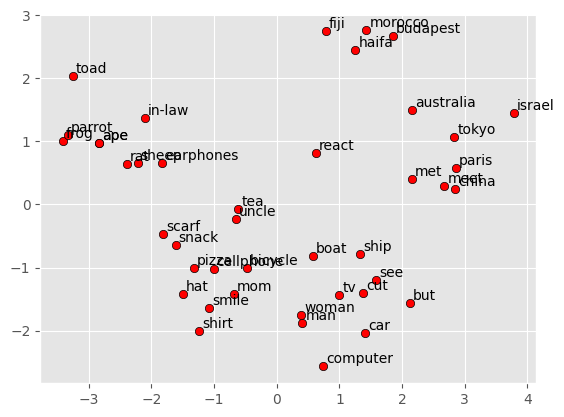

In [16]:

from sklearn.decomposition import PCA

words = ['see', 'tea', 'scarf', 'shirt', 'bicycle', 'mom', 'in-law', 'react',
                         'met', 'meet', 'uncle', 'pizza', 'snack', 'sheep', 'ship',
                         'but', 'cut', 'rat', 'hat', 'ape', 'car', 'boat',
                         'frog', 'toad', 'parrot', 'ape', 'man', 'woman', 'smile',
                         'australia', 'israel', 'morocco', 'fiji', 'china',
                         'paris', 'haifa', 'budapest', 'tokyo',
                         'computer', 'tv', 'cellphone', 'earphones']


# get the word vectors for each word
word_vectors = np.array([model[w] for w in words])
print(word_vectors.shape)

# perform PCA to reduce the dimensions to 2
two_dim = PCA().fit_transform(word_vectors)[:,:2]

plt.scatter(two_dim[:,0], two_dim[:,1], edgecolors='k', c='r')

for word, (x,y) in zip(words, two_dim):
    plt.text(x+0.05, y+0.05, word)
plt.show()

<font color="#5fbefe"> 
We was expecting the words to be clustered by their semantic or contextual similarity in this way: <br>
<ul>
<li>Family relationships: mom, in-law, uncle, man, woman</li>
<li>Transportation: bicycle, car, boat</li>
<li>Animals: sheep, ship, rat, frog, toad, parrot, ape</li>
<li>Clothing: scarf, shirt, hat</li>
<li>Food: pizza, snack</li>
<li>Technology: computer, tv, cellphone, earphones</li>
<li>Geographic locations: australia, israel, morocco, fiji, china, paris, haifa, budapest, tokyo</li>
<li>Verbs: see, react, met, meet, but, cut, smile</li>
</ul>
Some of them did clustered together as we expected, but not all of them. It could be because we are plotting the words only at 2 dimensions, but the words vectors has 100 dimensions, so if we could plot all 100 dimensions maybe they will group more like we expected.
</font>


# Question 5 - Distance


## 5.1 decide which of the following words is closer to the word "israel": "egypt", "jordan"


In [17]:
print(f"The similarity between 'israel' and 'egypt': {model.similarity('israel', 'egypt')}")
print(f"The similarity between 'israel' and 'jordan': {model.similarity('israel', 'jordan')}")

The similarity between 'israel' and 'egypt': 0.6934254765510559
The similarity between 'israel' and 'jordan': 0.6443417072296143


<font color="#5fbefe"> 'egypt' has a higher cosine similarity score, hence, 'egypt' is closer to 'israel' than 'jordan'.</font>


## 5.2 what is the distance between the closer word ("egypt" or "jordan") and "israel"?


In [18]:
print(f"The distance between 'israel' and 'egypt': {model.distance('israel', 'egypt')}")
print(f"The distance between 'israel' and 'jordan': {model.distance('israel', 'jordan')}")
print(f"\033[93m 'egypt' is closer to 'israel', the distance between them is: {model.distance('israel', 'egypt')} \033[0m")

The distance between 'israel' and 'egypt': 0.3065745234489441
The distance between 'israel' and 'jordan': 0.35565829277038574
 'egypt' is closer to 'israel', the distance between them is: 0.3065745234489441 


# Question 6 - Proximity


## 6.1 Find all the words that are closer to word2 than word1


### word1=student, word2=school


In [19]:
model.closer_than('school','student')

['college', 'students', 'schools', 'elementary']

### word1=brazil, word2=amazon


In [20]:
print(model.closer_than('amazon','brazil'))

['indian', 'internet', 'net', 'web', 'online', 'software', 'revenue', 'customers', 'microsoft', 'atlantic', 'ocean', 'users', 'colombia', 'apple', 'remote', 'delta', 'rio', 'peru', 'google', 'forests', 'ecuador', 'frontier', 'yahoo', 'bolivia', 'coca', 'java', 'jungle', 'aol', 'gaming', 'facebook', 'youtube', 'explorer', 'seller', 'oracle', 'gateway', 'logging', 'browser', 'shelf', 'ebay', 'verizon', 'surf', 'cisco', 'portal', 'itunes', 'netscape', 'royalties', 'starbucks', 'myspace', 'app', 'amazon.com', 'blackberry', 'andean', 'napster', 'surfers', 'andes', 'deforestation', 'rainforest', 'jungles', 'compuserve', 'msn', 'skype', 'kindle', 'netflix', 'craigslist', 'lycos', 'rainforests', 'orinoco', 'amazonian', 'bezos', 'manaus', 'mp3.com', 'barnesandnoble.com', 'emusic', 'unbox']


### word1=amazon, word2=brazil


In [21]:
print(model.closer_than('brazil','amazon'))

[',', 'in', "'s", 'as', 'it', 'has', 'this', 'will', ':', 'after', 'also', 'first', 'year', 'over', 'last', 'time', 'world', 'president', 'only', 'state', 'against', 'united', 'since', 'while', 'where', 'states', 'because', 'now', 'made', 'country', 'second', 'china', 'south', 'team', 'week', 'both', 'make', '1', 'wednesday', 'next', 'here', 'take', '10', 'set', 'month', 'sunday', 'place', 'third', 'took', 'economic', 'countries', 'came', 'saturday', 'play', 'following', 'expected', 'european', 'final', 'trade', 'oil', 'win', 'central', 'come', 'put', 'past', 'de', 'half', 'earlier', 'japan', 'ago', 'cup', 'region', 'today', 'although', 'again', 'france', 'lead', 'already', 'russia', 'economy', 'making', 'once', 'due', 'america', 'start', 'nations', 'india', 'despite', 'largest', 'germany', 'nation', 'europe', 'iran', 'match', 'behind', 'england', 'real', 'korea', 'taking', '2008', '2006', 'leading', 'australia', 'face', 'province', 'africa', 'key', 'eu', '2007', '2010', '2000', 'afric

## 6.2 Are there any word that are closer to "amazon" than "brazil" and are also closer to "brazil" than "amazon"? If so - list them


In [22]:
closer_to_amazon = model.closer_than('amazon','brazil')
closer_to_brazil = model.closer_than('brazil','amazon')
[word for word in closer_to_brazil if (word in closer_to_amazon)]

['colombia', 'rio', 'peru', 'ecuador', 'bolivia']